In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import highlight_text

In [131]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [132]:
#set default colors to use later
text_color = 'white'
background = '#313332'

In [142]:
#import data
df = pd.read_csv('beeswarm2.csv')
#df.head()
#df.Player.head() # noktalı yazınca 90s erişiemedi string olarak girmek daha doğru
#df['Prog'].head(10)

In [143]:
#create a new column for progressive passes per 90
df['Prog per90'] = df['Prog']/df['90s']
df

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Prog per90
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76,6.495726
1,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11,1.037736
2,Che Adams\Che-Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38,2.000000
3,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36,2.000000
4,Adrián\Adrian,es ESP,GK,Liverpool,2.0,43,62,69.4,1147,723,0,0.0,0.0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Andi Zeqiri\Andi-Zeqiri,ch SUI,FWDF,Brighton,0.8,5,11,45.5,89,34,0,0.0,0.0,0,1,1,1,1,1.250000
493,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,7.1,572,633,90.4,9341,2526,0,0.1,-0.1,1,43,8,0,39,5.492958
494,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,7.0,352,470,74.9,6238,1666,3,2.3,0.7,17,33,19,4,42,6.000000
495,Kurt Zouma\Kurt-Zouma,fr FRA,DF,Chelsea,15.0,1005,1110,90.5,23054,5819,0,0.0,0.0,1,72,2,0,46,3.066667


In [144]:

#filter the dataframe so it is only players who have played more than 6.5 90's which is about 585 minutes

df = df[df['90s']>=3].reset_index(drop=True) #filter out players with less then 3 full 90s played
df = df[df['Pos'] != 'GK'].reset_index(drop=True) # remove goalkeepers, We can use the drop parameter to avoid the old index being added as a column
df = df.sort_values(by='Prog per90',ascending=False)

In [136]:
#df.describe()

In [145]:
df.head(3)

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Prog per90
138,Pablo Hernández\Pablo-Hernandez,es ESP,MF,Leeds United,3.1,203,273,74.4,3961,1296,2,0.6,1.4,5,33,8,1,44,14.193548
9,Thiago Alcántara\Thiago-Alcantara,es ESP,MF,Liverpool,8.3,664,748,88.8,14012,3524,0,0.8,-0.8,12,85,10,1,83,10.000000
11,Trent Alexander-Arnold\Trent-Alexander-Arnold,eng ENG,DF,Liverpool,19.5,1332,1733,76.9,28923,11190,3,2.7,0.3,28,131,57,13,166,8.512821


Text(0.5, 0, 'Progressive Passes per 90')

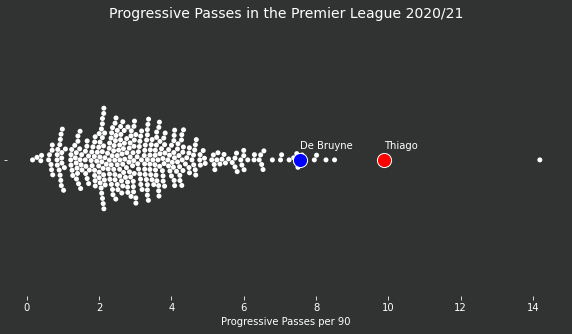

In [149]:
fig, ax = plt.subplots(figsize=(10,5)) #creates a figure and axis
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer 
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False) #get rid of the box around the plot (spines)

sns.swarmplot(x='Prog per90',data=df,color='white',zorder=1) # the beeswarm plot takes 3 arguments: column name, data source, color

#plot thiago - oyuncu karşılaştırması yapmanın kolay yolu scatter plot yaparak yerleştirmek ama verilerin elle girilmesi gerekli, dataframeden çekmeye çalış

#z-order plottaki elementlerin sırasını ayarlar burada white dotı arkada bırak ve red dotı öne çıkar, z*order arttıkça daha yukarıda yer alır
plt.scatter(x=9.87,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s='Thiago',x=9.87,y=-.04,c=text_color)

#plot de bruyne
plt.scatter(x=7.564,y=0,c='blue',edgecolor='white',s=200,zorder=2)
plt.text(s='De Bruyne',x=7.564,y=-.04,c=text_color)
plt.title('Progressive Passes in the Premier League 2020/21',c=text_color,fontsize=14)

plt.xlabel('Progressive Passes per 90',c=text_color)



#plt.savefig('swarm.png',dpi=500,bbox_inches = 'tight',facecolor=background)